<a href="https://colab.research.google.com/github/Christopher-Ramirez-S/An-lisis-de-datos/blob/Cris/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Adrian Rodriguez
#Rafael Garcia
#Cristopher Ramirez
#Eldon Calwell Salazar
#Aaron Navarro Balmaceda

import requests
import json
import concurrent.futures
import threading
import time
import logging
import os
from tqdm import tqdm
import datetime
import pandas as pd
import csv
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns


# Try to read the file, handling potential errors
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')
    data = pd.DataFrame(df)
except pd.errors.ParserError as e:
    print(f"An error occurred while reading the CSV file: {e}")
    # You might want to add more specific error handling or logging here

In [9]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

MessageError: Error: credential propagation was unsuccessful

In [54]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

data_con_fechas = data.dropna(subset=['release_date'])

pelicula_vieja = data_con_fechas.loc[data_con_fechas['release_date'].idxmin()]

print("Película más vieja:")
print("Título:", pelicula_vieja['title'])
print("Fecha de lanzamiento:", pelicula_vieja['release_date'])

Película más vieja:
Título: בראול סטארס בחיים האמיתיים-אלון קאט
Fecha de lanzamiento: 1800-01-01 00:00:00


In [55]:
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2024-12-31')

filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105739,717951,Kickin It High,0.000,0,Released,2004-01-20,0,105,False,NaN,...,Kickin It High,Ruff Ryder recording artist Sean Cross stars i...,0.667,/dmyng4zZajCSSAX5k4zk3QXyO11.jpg,How far would you go to get respect?,Drama,NaN,United States of America,NaN,NaN
1105740,717952,Weightless,0.000,0,Released,2019-04-30,0,0,False,NaN,...,Weightless,NaN,0.600,NaN,NaN,Documentary,NaN,France,NaN,NaN
1105741,717953,Raumstation Kuhbase,0.000,0,Released,2001-05-30,0,0,False,NaN,...,Raumstation Kuhbase,NaN,0.600,/pUjJrQItHJtVtLgRZF6BvqVfbG4.jpg,NaN,"Science Fiction, Animation",NaN,NaN,NaN,NaN
1105742,717954,La nostra pietra,0.000,0,Released,2019-04-30,0,0,False,NaN,...,La nostra pietra,NaN,0.600,/AwitlBRf2gLvrXGl1r064eAV9X7.jpg,NaN,Documentary,NaN,"Germany, Italy",NaN,NaN


In [61]:


juegos_del_hambre =['The Hunger Games','The Hunger Games: Catching Fire','The Hunger Games: Mockingjay - Part 1', 'The Hunger Games: Mockingjay - Part 2','The Hunger Games: The Ballad of Songbirds & Snakes']

pelicula_mejor_revenue = df[df['title'].isin(juegos_del_hambre)][['title', 'revenue', 'release_date']].loc[df[df['title'].isin(juegos_del_hambre)]['revenue'].notnull()]
print("La película de LOTR con más votos:")

pelicula_mejor_revenue

La película de LOTR con más votos:


,title,revenue,release_date
31,The Hunger Games,694394724,2012-03-12
88,The Hunger Games: Catching Fire,865011746,2013-11-15
112,The Hunger Games: Mockingjay - Part 1,755356711,2014-11-19
199,The Hunger Games: Mockingjay - Part 2,653428261,2015-11-18
576422,The Hunger Games,0,NaN
1088395,The Hunger Games: The Ballad of Songbirds & Sn...,0,2023-11-15


In [63]:
juegos_del_hambre =['The Hunger Games','The Hunger Games: Catching Fire','The Hunger Games: Mockingjay - Part 1', 'The Hunger Games: Mockingjay - Part 2','The Hunger Games: The Ballad of Songbirds & Snakes']

revenue_de_las_peliculas = df[df['title'].isin(juegos_del_hambre)][['title', 'revenue', 'release_date']].loc[df[df['title'].isin(juegos_del_hambre)]['revenue'].notnull()]
print("Revenue de la saga por pelicula")

revenue_de_las_peliculas = revenue_de_las_peliculas.sort_values('revenue', ascending=False) # Changed pelicula_con_mejor_revenue to revenue_de_las_peliculas

revenue_de_las_peliculas


Revenue de la saga por pelicula


,title,revenue,release_date
88,The Hunger Games: Catching Fire,865011746,2013-11-15
112,The Hunger Games: Mockingjay - Part 1,755356711,2014-11-19
31,The Hunger Games,694394724,2012-03-12
199,The Hunger Games: Mockingjay - Part 2,653428261,2015-11-18
576422,The Hunger Games,0,NaN
1088395,The Hunger Games: The Ballad of Songbirds & Sn...,0,2023-11-15


In [45]:
revenue_de_las_peliculas=df.groupby("title")["revenue"]

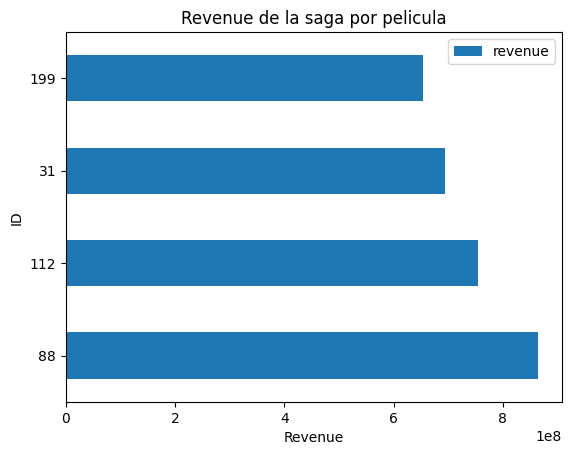

In [68]:
revenue_de_las_peliculas.head(4).plot.barh()
plt.ylabel("ID")
plt.xlabel("Revenue")
plt.title("Revenue de la saga por pelicula")
plt.show()